In [1]:
from bs4 import BeautifulSoup
import urllib
import requests
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import re
from boilerpipe.extract import Extractor
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
# search term
URL = 'https://www.indeed.com/jobs?q="data+scientist"&l='

In [187]:
num_jobs = int(soup.find(id = 'searchCount').string.split()[-1].replace(',',''))

num_pages = int(num_jobs/10)

In [189]:
base = "https://www.indeed.com"

In [51]:
def read_page(url):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, "lxml")
    return soup

In [335]:
def keywords(url):

    try:
        extractor = Extractor(extractor='ArticleExtractor', url=base+url)
    except:
        return None

    page_content = extractor.getText()

    page_content = re.sub("[^a-zA-Z.+3]"," ", page_content)
    #page_content = page_content.replace('r', "R")
    stop_words = nltk.corpus.stopwords.words('english') + [
        '.',
        ',',
        '--',
        '\'s',
        '?',
        ')',
        '(',
        ':',
        '\'',
        '\'re',
        '"',
        '-',
        '}',
        '{',
        u'—',
        ]
    
    page_content = page_content.lower()

    tokens = nltk.word_tokenize(page_content)
    tokens = [token for token in tokens if token not in stop_words]
    page_content = " ".join(tokens)

    blob = TextBlob(page_content)


    return blob

In [341]:
skills = pd.read_csv('skills.csv')
skills['Count'] = 0
def count_(candidate):
    
    unigrams = blob.ngrams(n=1)
    bigrams = blob.ngrams(n=2)
    
    unigrams = ["".join(unigram) for unigram in unigrams]
    bigrams = [" ".join(bigram) for bigram in bigrams]
  
    if len(candidate.split()) == 2:
        return int(candidate in bigrams)
    else:
        if candidate == 'statistics':
            return int(candidate in unigrams or 'statistical' in unigrams)
        return int(candidate in unigrams)
    
for i in range(num_pages+1):
    print ("Page ", i + 1)
    start_num = str(i*10)
    current_page = ''.join([URL, '&start=', start_num])
    page = urllib.request.urlopen(current_page)
    soup = BeautifulSoup(page, "lxml")
    soup.findAll('div', attrs={'class' : ' row result'})
    urls = soup.findAll('a',{'rel':'nofollow','target':'_blank'})
    urls = [link['href'] for link in urls]
    for url in urls:
        blob = keywords(url)
        if blob:
            skills['Count'] += skills['Skill_Lower'].apply(count_) 
    

Page  1
Page  2
Page  3
Page  4
Page  5
Page  6
Page  7
Page  8
Page  9
Page  10
Page  11
Page  12
Page  13
Page  14
Page  15
Page  16
Page  17
Page  18
Page  19
Page  20
Page  21
Page  22
Page  23
Page  24
Page  25
Page  26
Page  27
Page  28
Page  29
Page  30
Page  31
Page  32
Page  33
Page  34
Page  35
Page  36
Page  37
Page  38
Page  39
Page  40
Page  41
Page  42
Page  43
Page  44
Page  45
Page  46
Page  47
Page  48
Page  49
Page  50
Page  51
Page  52
Page  53
Page  54
Page  55
Page  56
Page  57
Page  58
Page  59
Page  60
Page  61
Page  62
Page  63
Page  64
Page  65
Page  66
Page  67
Page  68
Page  69
Page  70
Page  71
Page  72
Page  73
Page  74
Page  75
Page  76
Page  77
Page  78
Page  79
Page  80
Page  81
Page  82
Page  83
Page  84
Page  85
Page  86
Page  87
Page  88
Page  89
Page  90
Page  91
Page  92
Page  93
Page  94
Page  95
Page  96
Page  97
Page  98
Page  99
Page  100
Page  101
Page  102
Page  103
Page  104
Page  105
Page  106
Page  107
Page  108
Page  109
Page  110
Page  11

In [339]:
skills=pd.read_csv('skills.csv')

In [342]:
skills.sort_values(by='Count')

,Skill,Skill_Lower,Alternative,Count
0,SQL,sql,NaN,410
1,Hadoop,hadoop,NaN,268
2,Python,python,NaN,554
3,Machine Learning,machine learning,ML,492
4,Spark,spark,NaN,199
5,R,r,NaN,574
6,C,c,C++,195
7,NoSQL,nosql,NaN,84
8,Hive,hive,NaN,135
9,SAS,sas,NaN,240


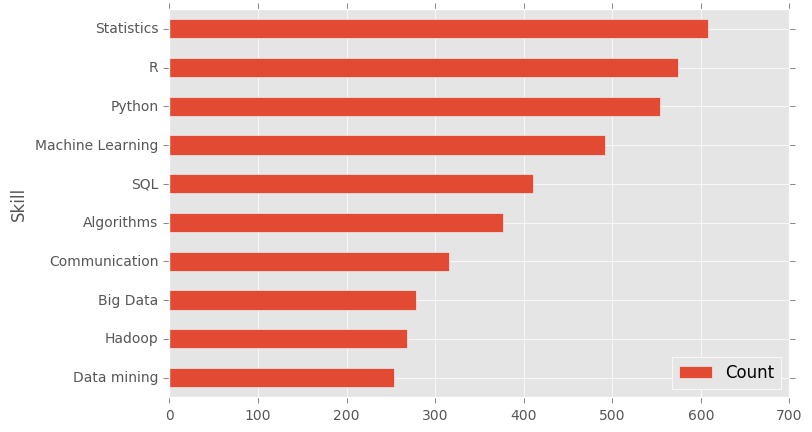

In [18]:
skills.to

skills = pd.read_csv('skills_output.csv')
skills = skills.replace('C', 'C/C++')
top_skills = skills.sort_values('Count', ascending=0).head(10)[['Skill', 'Count']]
top_skills.plot(kind='barh', x='Skill', figsize=(8,5)).invert_yaxis()

In [19]:
skills

,Skill,Skill_Lower,Alternative,Count
0,SQL,sql,NaN,410
1,Hadoop,hadoop,NaN,268
2,Python,python,NaN,554
3,Machine Learning,machine learning,ML,492
4,Spark,spark,NaN,199
5,R,r,NaN,574
6,C/C++,c,C++,195
7,NoSQL,nosql,NaN,84
8,Hive,hive,NaN,135
9,SAS,sas,NaN,240
